# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

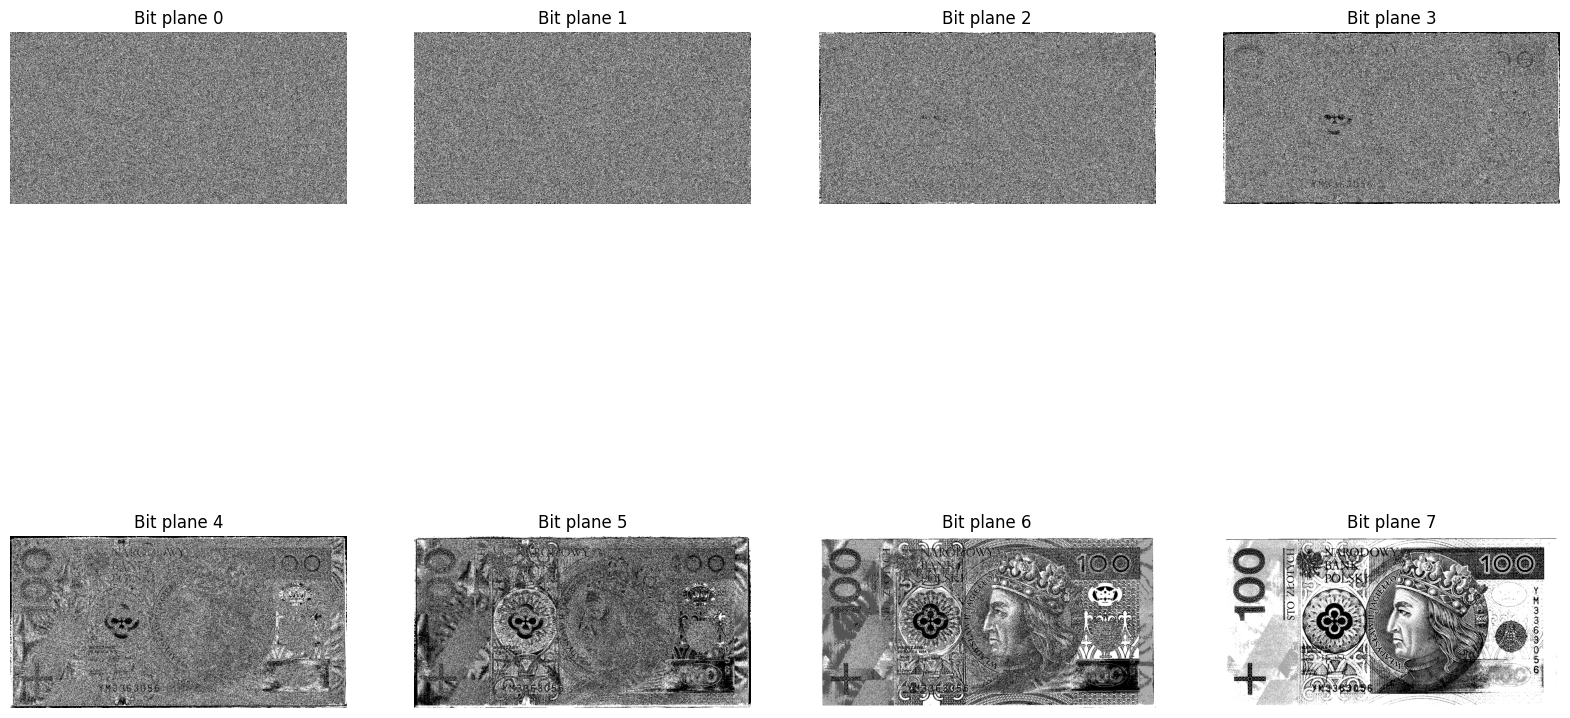

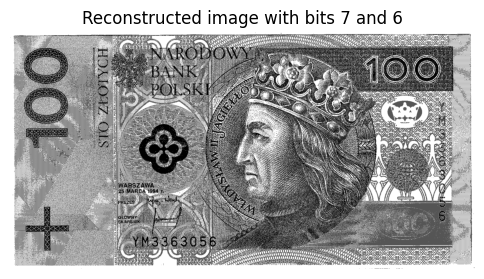

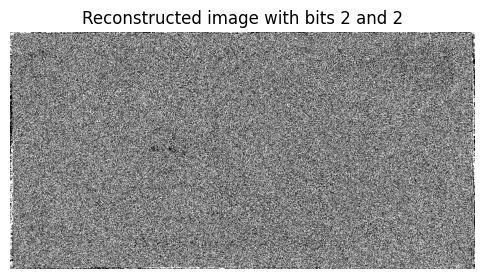

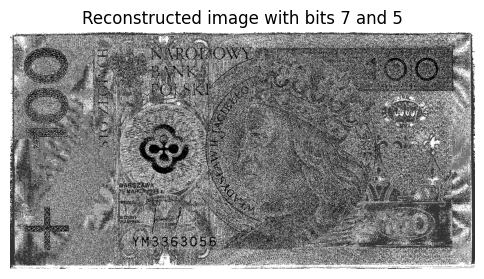

In [2]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

img_banknot = cv2.imread('100zloty.jpg', cv2.IMREAD_GRAYSCALE)

def bit_plane_slice(img, bit):
    return (img >> bit) & 1

bit_planes = []
for i in range(8):
    bit_plane = bit_plane_slice(img_banknot, i)
    bit_planes.append(bit_plane)

plt.figure(figsize=(20, 12))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title('Bit plane ' + str(i))
    plt.axis('off')
plt.show()

def reconstruct_image_from_specific_bits(bit_planes, bit_indices):
    reconstructed_image = sum([bit_planes[i] * (2 ** (7 - i)) for i in bit_indices])
    return reconstructed_image

selected_bits_1 = [7, 6]
selected_bits_2 = [7, 2]
selected_bits_3 = [7, 5]

reconstructed_image_1 = reconstruct_image_from_specific_bits(bit_planes, selected_bits_1)
reconstructed_image_2 = reconstruct_image_from_specific_bits(bit_planes, selected_bits_2)
reconstructed_image_3 = reconstruct_image_from_specific_bits(bit_planes, selected_bits_3)

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_1, cmap='gray')
plt.title('Reconstructed image with bits 7 and 6')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_2, cmap='gray')
plt.title('Reconstructed image with bits 2 and 2')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(reconstructed_image_3, cmap='gray')
plt.title('Reconstructed image with bits 7 and 5')
plt.axis('off')
plt.show()

